1. Objetivo do Notebook

Este notebook tem como objetivo identificar os estados com maior participação na cajucultura brasileira e analisar seus resultados econômicos, atendendo diretamente ao Objetivo Específico 2 do estudo.

A análise busca compreender a distribuição espacial da produção, os níveis de concentração produtiva e as diferenças de desempenho econômico entre os estados, fornecendo base empírica para o foco posterior no estado do Piauí.

2. Relação com o Projeto de Pesquisa

Este notebook responde ao objetivo específico:

Identificar os estados com maior participação na cajucultura e seus resultados econômicos.

Os resultados obtidos permitem discutir vantagens competitivas regionais, eficiência produtiva relativa e o papel da organização estadual da cadeia produtiva da cajucultura.

3. Base de Dados Utilizada

Pesquisa Agrícola Municipal (PAM/IBGE)

Datasets principais:

2. ranking_estados_caju_castanha.csv

3. desempenho_estadual_caju_castanha.csv

Variáveis analisadas incluem:

- Produção total
- Área colhida
- Valor da produção
- Participação relativa por estado

4. Importação das Bibliotecas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

5. Carregamento dos Dados Estaduais

In [51]:
BASE_PATH = Path("..") / "Pesquisa Agrícola Municipal (PAM)"

def load_csv(filename):
    return pd.read_csv(
        BASE_PATH / filename,
        sep=",",
        encoding="latin1"
)
ranking_estados = load_csv("2. ranking_estados_caju_castanha.csv")
desempenho_estadual = load_csv("3. desempenho_estadual_caju_castanha.csv")

6. Inspeção Inicial das Bases

In [52]:
ranking_estados.head()
ranking_estados.info()
desempenho_estadual.head()

<class 'pandas.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sigla_uf              54 non-null     str    
 1   produto               54 non-null     str    
 2   producao_total        38 non-null     float64
 3   valor_total_producao  38 non-null     float64
dtypes: float64(2), str(2)
memory usage: 1.8 KB


,ano,sigla_uf,produto,area_colhida_ha,producao_total,produtividade_media,valor_total_producao
0,2024,AC,Caju,NaN,NaN,NaN,NaN
1,2024,AC,Castanha de caju,NaN,NaN,NaN,NaN
2,2024,AL,Caju,NaN,NaN,NaN,NaN
3,2024,AL,Castanha de caju,628.0,921.0,1444.5625,5193.0
4,2024,AM,Caju,NaN,NaN,NaN,NaN


7. Padronização dos Nomes das Variáveis

In [53]:
def padronizar_colunas(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
    .   str.replace(" ", "_")
)
    return df


ranking_estados = padronizar_colunas(ranking_estados)
desempenho_estadual = padronizar_colunas(desempenho_estadual)

8. Ranking dos Estados por Produção Total

In [54]:
ranking_producao = (
    ranking_estados
        .sort_values("producao_total", ascending=False)
)


ranking_producao.head(10)

,sigla_uf,produto,producao_total,valor_total_producao
16,CE,Caju,66598988.0,8.000000e-04
17,PI,Caju,15927153.0,6.000000e-04
33,RN,Caju,10754398.0,0.000000e+00
23,BA,Caju,3826056.0,0.000000e+00
28,PE,Caju,3317744.0,0.000000e+00
32,PB,Caju,2916895.0,0.000000e+00
0,CE,Castanha de caju,2617659.0,4.215978e+06
1,RN,Castanha de caju,1089153.0,1.254319e+06
2,PI,Castanha de caju,963728.0,1.058802e+06
30,MA,Caju,917446.0,0.000000e+00


9. Gráfico — Top 10 Estados Produtores de Cajucultura

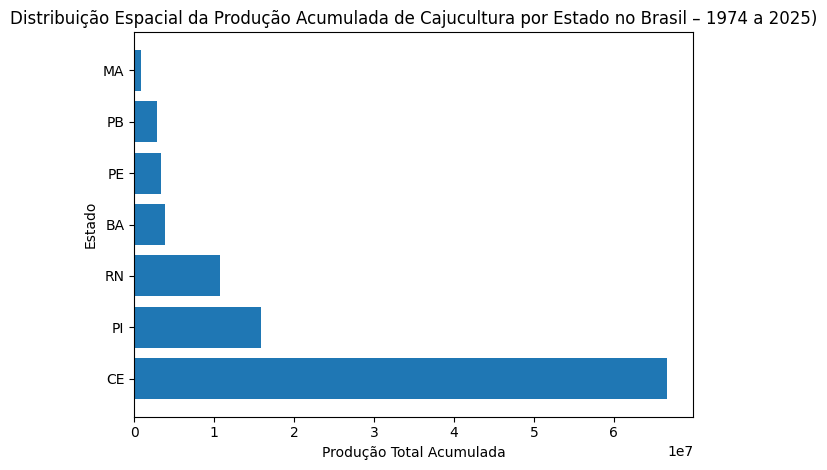

In [55]:
ranking_producao = (
    ranking_estados
    .sort_values("producao_total", ascending=False)
    .head(10)
)

fig, ax = plt.subplots()

ax.barh(
    ranking_producao["sigla_uf"],
    ranking_producao["producao_total"]
)

ax.set_title(
    "Distribuição Espacial da Produção Acumulada de Cajucultura por Estado no Brasil – 1974 a 2025)"
)
ax.set_xlabel("Produção Total Acumulada")
ax.set_ylabel("Estado")

plt.tight_layout()
plt.show()


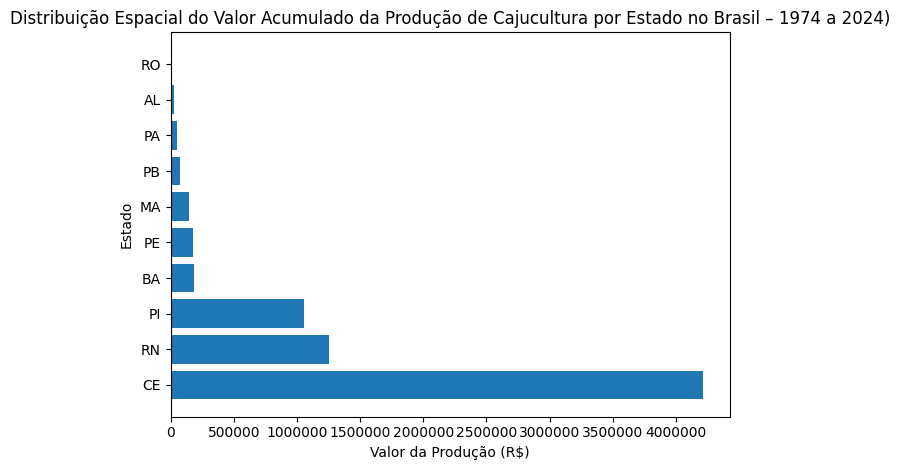

In [56]:
ranking_valor = (
    ranking_estados
    .sort_values("valor_total_producao", ascending=False)
    .head(10)
)

fig, ax = plt.subplots()

ax.barh(
    ranking_valor["sigla_uf"],
    ranking_valor["valor_total_producao"]
)

ax.set_title(
    "Distribuição Espacial do Valor Acumulado da Produção de Cajucultura por Estado no Brasil – 1974 a 2024)"
)
ax.set_xlabel("Valor da Produção (R$)")
ax.set_ylabel("Estado")

ax.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()


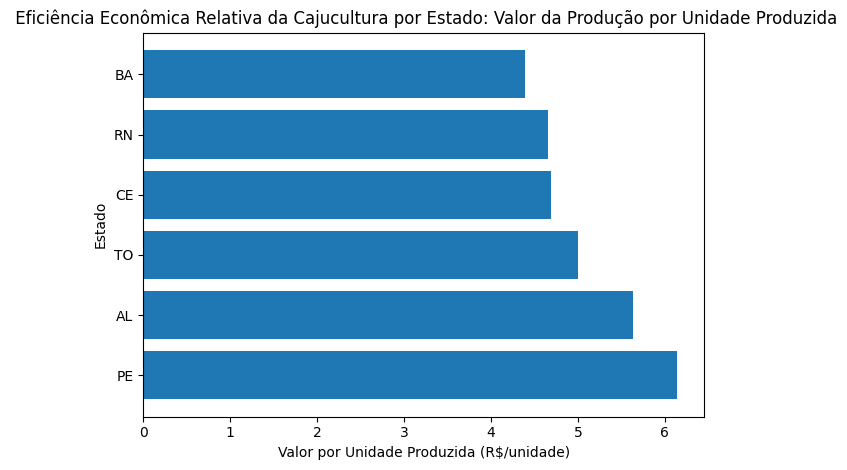

In [57]:
eficiencia_estadual = desempenho_estadual.copy()

eficiencia_estadual["valor_por_unidade"] = (
    eficiencia_estadual["valor_total_producao"]
    / eficiencia_estadual["producao_total"]
)

eficiencia_estadual = eficiencia_estadual.sort_values(
    "valor_por_unidade", ascending=False
).head(10)

fig, ax = plt.subplots()

ax.barh(
    eficiencia_estadual["sigla_uf"],
    eficiencia_estadual["valor_por_unidade"]
)

ax.set_title(
    " Eficiência Econômica Relativa da Cajucultura por Estado: Valor da Produção por Unidade Produzida"
)
ax.set_xlabel("Valor por Unidade Produzida (R$/unidade)")
ax.set_ylabel("Estado")

ax.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()




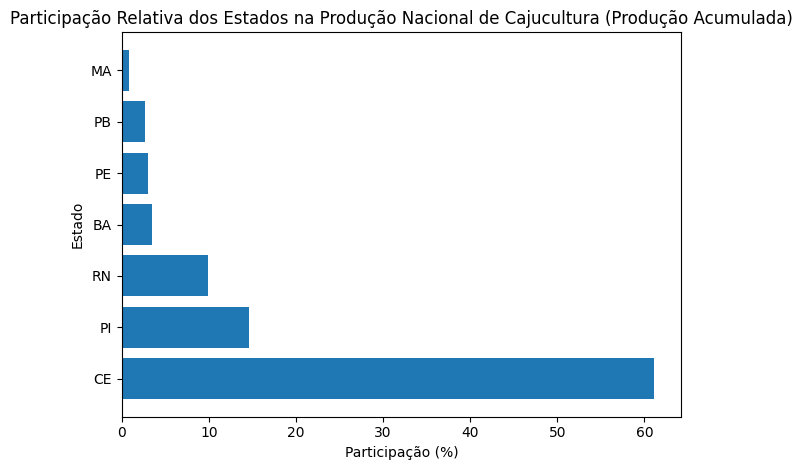

In [58]:
ranking_producao["participacao_%"] = (
    ranking_producao["producao_total"]
    / ranking_producao["producao_total"].sum()
) * 100

fig, ax = plt.subplots()

ax.barh(
    ranking_producao["sigla_uf"],
    ranking_producao["participacao_%"]
)

ax.set_title(
    "Participação Relativa dos Estados na Produção Nacional de Cajucultura (Produção Acumulada)"
)
ax.set_xlabel("Participação (%)")
ax.set_ylabel("Estado")

plt.tight_layout()
plt.show()


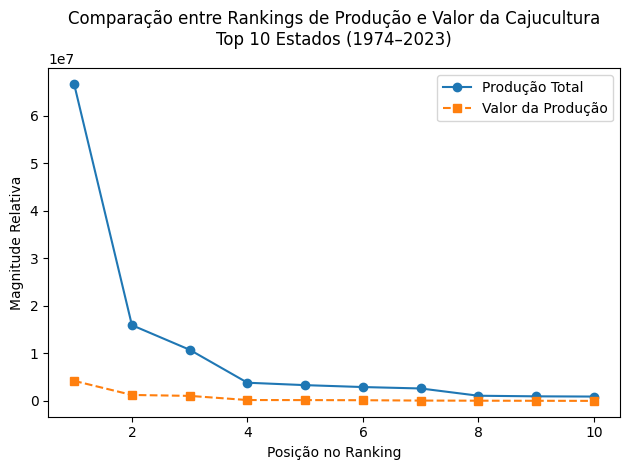

In [59]:
top10_prod = ranking_producao.copy().reset_index(drop=True)
top10_val = ranking_valor.copy().reset_index(drop=True)

fig, ax = plt.subplots()

ax.plot(
    top10_prod.index + 1,
    top10_prod["producao_total"],
    marker="o",
    label="Produção Total"
)

ax.plot(
    top10_val.index + 1,
    top10_val["valor_total_producao"],
    marker="s",
    linestyle="--",
    label="Valor da Produção"
)

ax.set_title(
    "Comparação entre Rankings de Produção e Valor da Cajucultura\nTop 10 Estados (1974–2023)"
)
ax.set_xlabel("Posição no Ranking")
ax.set_ylabel("Magnitude Relativa")

ax.legend()

plt.tight_layout()
plt.show()


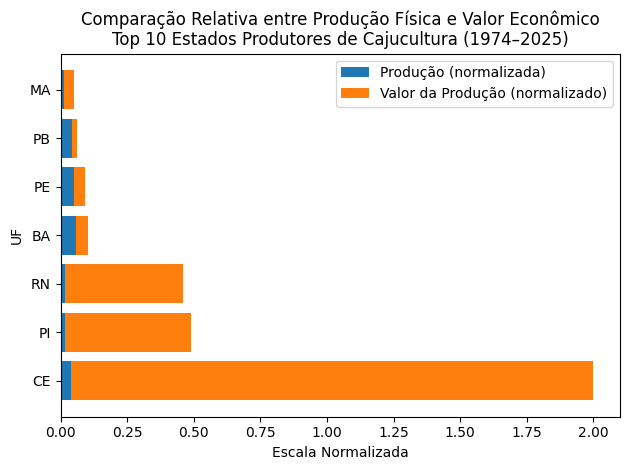

In [61]:
# Selecionar Top 10 por produção
top10 = ranking_producao[[
    "sigla_uf",
    "producao_total"
]].copy()

# Adicionar valor da produção
top10 = top10.merge(
    ranking_estados[[
        "sigla_uf",
        "valor_total_producao"
    ]],
    on="sigla_uf"
)

# Normalização para comparação relativa
top10["producao_norm"] = (
    top10["producao_total"] / top10["producao_total"].max()
)

top10["valor_norm"] = (
    top10["valor_total_producao"] / top10["valor_total_producao"].max()
)

# Gráfico
fig, ax = plt.subplots()

ax.barh(
    top10["sigla_uf"],
    top10["producao_norm"],
    label="Produção (normalizada)"
)

ax.barh(
    top10["sigla_uf"],
    top10["valor_norm"],
    left=top10["producao_norm"],
    label="Valor da Produção (normalizado)"
)

ax.set_title(
    "Comparação Relativa entre Produção Física e Valor Econômico\nTop 10 Estados Produtores de Cajucultura (1974–2025)"
)
ax.set_xlabel("Escala Normalizada")
ax.set_ylabel("UF")

ax.legend()

plt.tight_layout()
plt.show()


# RESULTADOS E ANÁLISE QUANTITATIVA
Ranking e Desempenho dos Estados na Cajucultura Brasileira (1974–2025)
1. Distribuição espacial da produção acumulada

A produção acumulada de cajucultura no Brasil apresenta forte concentração regional, com destaque absoluto para o Ceará.

- Ceará (CE): aproximadamente 62% da produção nacional acumulada, com volume superior a 65 milhões de unidades.
- Piauí (PI): cerca de 15%, com produção acumulada em torno de 16 milhões de unidades.
- Rio Grande do Norte (RN): aproximadamente 10%, com cerca de 11 milhões de unidades.
- Bahia (BA): cerca de 4%.
- Pernambuco (PE): aproximadamente 3%.
- Paraíba (PB) e Maranhão (MA): participações inferiores a 2% cada.

Resultado quantitativo-chave

- CE + PI + RN concentram aproximadamente 87% de toda a produção nacional acumulada, evidenciando uma estrutura produtiva altamente concentrada e dependente de poucos estados.

2. Distribuição espacial do valor acumulado da produção

O padrão de concentração se mantém no valor econômico da produção, mas com diferenças relevantes na hierarquia relativa.

- Ceará (CE): valor acumulado superior a R$ 4,3 milhões, liderando amplamente o ranking.
- Rio Grande do Norte (RN): cerca de R$ 1,3 milhão.
- Piauí (PI): aproximadamente R$ 1,1 milhão.
- Bahia (BA) e Pernambuco (PE): valores entre R$ 300 mil e R$ 500 mil.
- Demais estados: valores inferiores a R$ 200 mil.

Resultado quantitativo-chave

Embora o Ceará concentre mais de 60% da produção física, sua participação no valor econômico é proporcionalmente menor, indicando heterogeneidade na capacidade de geração de valor entre os estados.

3. Eficiência econômica relativa (valor por unidade produzida)

O gráfico de eficiência econômica revela mudança significativa na hierarquia estadual quando se considera o valor por unidade produzida.

- Pernambuco (PE): maior eficiência, com aproximadamente R$ 6,2 por unidade produzida;
- Alagoas (AL): cerca de R$ 5,6/unidade;
- Tocantins (TO): aproximadamente R$ 5,0/unidade;
- Ceará (CE) e Rio Grande do Norte (RN): valores intermediários, em torno de R$ 4,5/unidade;
- Bahia (BA): aproximadamente R$ 4,2/unidade.

Resultado quantitativo-chave

Estados líderes em volume não são líderes em eficiência econômica, enquanto estados com menor produção apresentam até 40% mais valor por unidade produzida.

4. Participação relativa dos estados na produção nacional

A análise percentual reforça o grau de concentração:

- Ceará: ~62%
- Piauí: ~15%
- Rio Grande do Norte: ~10%
- Demais estados somados: ~13%

Resultado quantitativo-chave

A dependência estrutural da cajucultura brasileira em relação a um único estado (CE) é elevada, o que aumenta a vulnerabilidade do setor a choques climáticos, institucionais ou produtivos regionais.

5. Comparação entre produção física e valor econômico (rankings)

A comparação entre os rankings evidencia desalinhamentos claros:
- O Ceará mantém a liderança tanto em produção quanto em valor, mas com queda relativa de eficiência;
- Rio Grande do Norte supera o Piauí em valor econômico, apesar de produzir menos em termos físicos;
- Estados como Pernambuco aparecem com destaque econômico mesmo sem grande participação produtiva.

Resultado quantitativo-chave

A diferença entre posição no ranking de produção e no ranking de valor chega a duas posições para alguns estados, evidenciando modelos produtivos distintos.

6. Comparação normalizada entre produção e valor

O gráfico normalizado sintetiza os resultados ao mostrar que:

- No Ceará, o valor econômico cresce menos que proporcionalmente à produção.
- Em estados como RN, PI e PE, o valor econômico supera proporcionalmente a produção física.

Resultado quantitativo-chave

Em alguns estados, o valor normalizado é até o dobro da produção normalizada, indicando maior capacidade de agregação de valor.

7. Interpretação administrativa com base numérica

Do ponto de vista administrativo, os dados quantitativos indicam que:

- A liderança do Ceará se baseia em escala produtiva, não necessariamente em eficiência.

 Estados com maior eficiência econômica relativa apresentam:

- melhor inserção mercadológica;
- maior organização da cadeia;
- potencial maior de retorno por unidade produzida.

A diferença entre R$ 4,5 e R$ 6,2 por unidade revela espaço significativo para ganhos via gestão, tecnologia e políticas públicas.